# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [102]:
!pip install xgboost==2.0.3

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 162.5 kB/s eta 0:10:14
   ---------------------------------------- 0.0/99.8 MB 162.5 kB/s eta 0:10:14
   ---------------------------------------- 0.0/99.8 MB 131.3 kB/s eta 0:12:40
   ---------------------------------------- 0.0/99.8 MB 163.4 kB/s eta 0:10:11
   ---------------------------------------- 0.1/99.8 MB 192.5 kB/s eta 0:08:38
   ---------------------------------------- 0.1/99.8 MB 192.5 kB/s eta 0:08:38
   ---------------------------------------- 0.1/99.8 MB 209.5 kB/s eta 0:07:56
   ---------------------------------------- 0.1/99.8 MB 248.7 kB/s eta 0:06:41
   ---------------------------------------- 0.2/99.8 MB 327.7 kB/s eta 0:05:04
   ---------------------------------------- 0.2/99.8 MB 327.7 kB/s eta 0:05:04


In [125]:
pip install -U scikit-learn

  You can safely remove it manually.



   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 93.9 kB/s eta 0:01:57
   ---------------------------------------- 0.0/10.9 MB 93.9 kB/s eta 0:01:57
   ---------------------------------------- 0.0/10.9 MB 140.3 kB/s eta 0:01:18
   ---------------------------------------- 0.0/10.9 MB 140.3 kB/s eta 0:01:18
   ---------------------------------------- 0.0/10.9 MB

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

In [6]:
data=pd.read_csv("EasyVisa (1).csv")
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Data Overview

- Observations
- Sanity checks

In [11]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [13]:
data.shape

(25480, 12)

In [19]:
missing_values = data.isnull().sum()
missing_values

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [21]:
data_types = data.dtypes
data_types

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [23]:
# Generate summary statistics for numerical columns
numerical_summary = data[['no_of_employees', 'yr_of_estab', 'prevailing_wage']].describe()

# Display the summary statistics
numerical_summary

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [25]:
# Analyze the distribution of categorical variables
categorical_columns = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training',
                       'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

# Calculate the unique values and their counts for each categorical column
categorical_analysis = {col: data[col].value_counts() for col in categorical_columns}

categorical_analysis

{'continent': continent
 Asia             16861
 Europe            3732
 North America     3292
 South America      852
 Africa             551
 Oceania            192
 Name: count, dtype: int64,
 'education_of_employee': education_of_employee
 Bachelor's     10234
 Master's        9634
 High School     3420
 Doctorate       2192
 Name: count, dtype: int64,
 'has_job_experience': has_job_experience
 Y    14802
 N    10678
 Name: count, dtype: int64,
 'requires_job_training': requires_job_training
 N    22525
 Y     2955
 Name: count, dtype: int64,
 'region_of_employment': region_of_employment
 Northeast    7195
 South        7017
 West         6586
 Midwest      4307
 Island        375
 Name: count, dtype: int64,
 'unit_of_wage': unit_of_wage
 Year     22962
 Hour      2157
 Week       272
 Month       89
 Name: count, dtype: int64,
 'full_time_position': full_time_position
 Y    22773
 N     2707
 Name: count, dtype: int64,
 'case_status': case_status
 Certified    17018
 Denied      

## Exploratory Data Analysis (EDA)


**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Education vs Visa Status:
case_status            Certified    Denied
education_of_employee                     
Bachelor's              0.622142  0.377858
Doctorate               0.872263  0.127737
High School             0.340351  0.659649
Master's                0.786278  0.213722


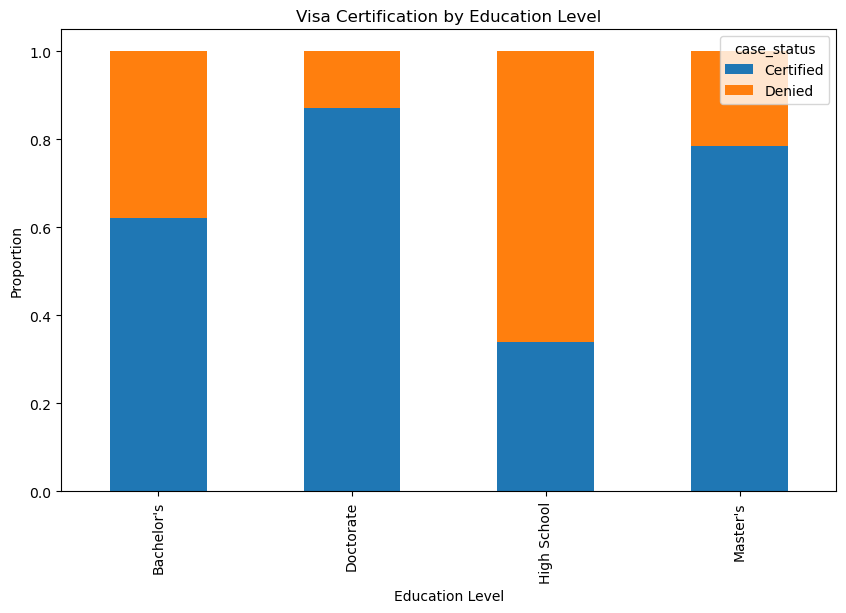

In [30]:
# 1. Education and Visa Certification
education_vs_status = data.groupby('education_of_employee')['case_status'].value_counts(normalize=True).unstack()
print("Education vs Visa Status:")
print(education_vs_status)

education_vs_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Visa Certification by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.show()



Education vs Visa Status: This analysis shows how the education level of applicants affects visa approval rates.

Continent vs Visa Status:
case_status    Certified    Denied
continent                         
Africa          0.720508  0.279492
Asia            0.653105  0.346895
Europe          0.792337  0.207663
North America   0.618773  0.381227
Oceania         0.635417  0.364583
South America   0.578638  0.421362


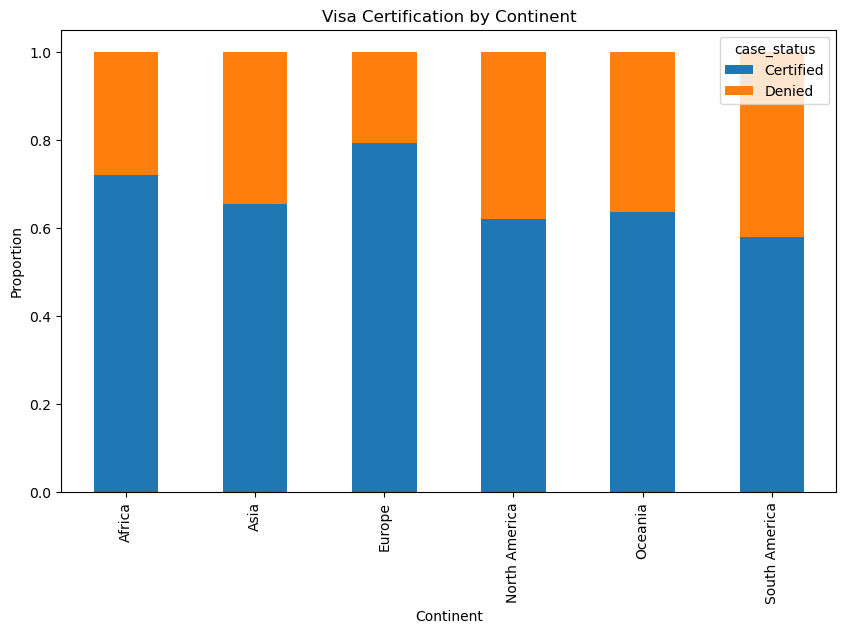

In [32]:
# 2. Visa Status Across Continents
continent_vs_status = data.groupby('continent')['case_status'].value_counts(normalize=True).unstack()
print("Continent vs Visa Status:")
print(continent_vs_status)

continent_vs_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Visa Certification by Continent')
plt.xlabel('Continent')
plt.ylabel('Proportion')
plt.show()



Continent vs Visa Status: This provides insights into visa certification trends across different continents.

Work Experience vs Visa Status:
case_status         Certified    Denied
has_job_experience                     
N                    0.561341  0.438659
Y                    0.744764  0.255236


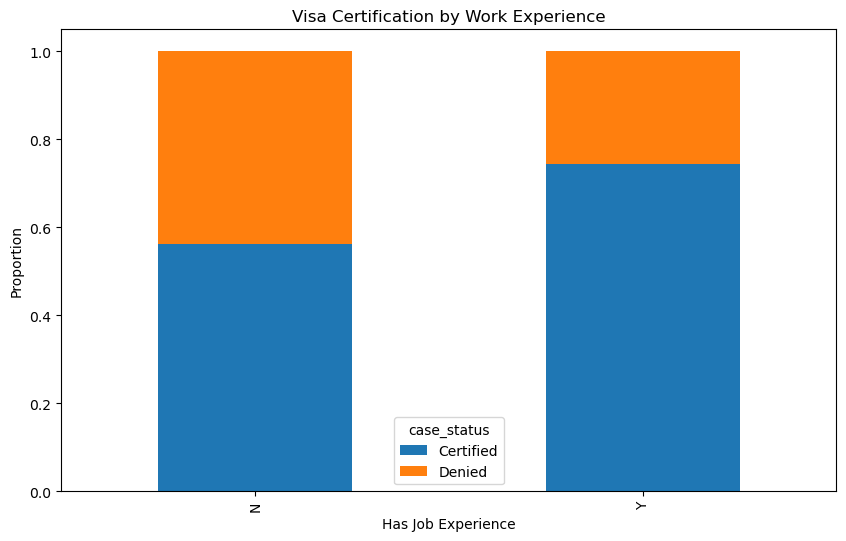

In [34]:
# 3. Work Experience and Visa Status
experience_vs_status = data.groupby('has_job_experience')['case_status'].value_counts(normalize=True).unstack()
print("Work Experience vs Visa Status:")
print(experience_vs_status)

experience_vs_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Visa Certification by Work Experience')
plt.xlabel('Has Job Experience')
plt.ylabel('Proportion')
plt.show()



Work Experience vs Visa Status: This shows whether having job experience impacts visa approval chances.


Unit of Wage vs Visa Status:
case_status   Certified    Denied
unit_of_wage                     
Hour           0.346314  0.653686
Month          0.617978  0.382022
Week           0.621324  0.378676
Year           0.698850  0.301150


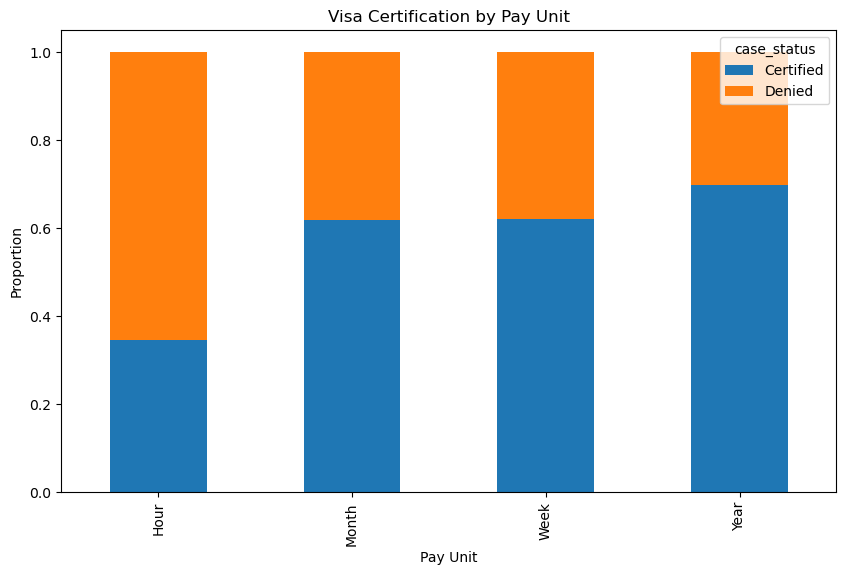

In [36]:
# 4. Pay Unit and Visa Certification
unit_vs_status = data.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).unstack()
print("Unit of Wage vs Visa Status:")
print(unit_vs_status)

unit_vs_status.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Visa Certification by Pay Unit')
plt.xlabel('Pay Unit')
plt.ylabel('Proportion')
plt.show()



Pay Unit vs Visa Status: Analyzes which pay unit (hourly, weekly, monthly, yearly) is more likely to be associated with visa certifications.


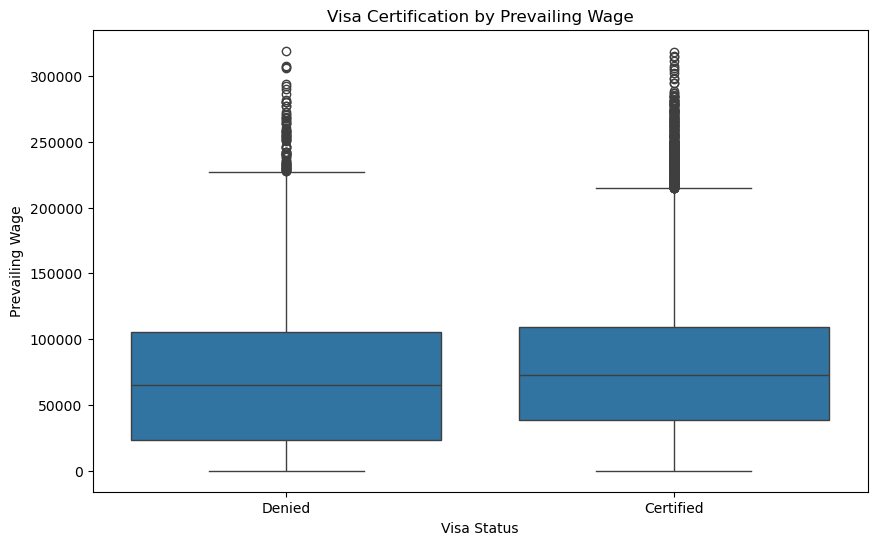

In [38]:
# 5. Prevailing Wage and Visa Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='case_status', y='prevailing_wage', data=data)
plt.title('Visa Certification by Prevailing Wage')
plt.xlabel('Visa Status')
plt.ylabel('Prevailing Wage')
plt.show()

Prevailing Wage vs Visa Status: Visualizes the impact of prevailing wage on visa status using a boxplot to compare wages for certified vs. denied cases.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [51]:
# 1. Missing Value Treatment (if needed)
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [ ]:
# 2. Feature Engineering
# Create new feature 'company_age'
current_year = 2024
data['company_age'] = current_year - data['yr_of_estab']

# Log transformation of 'prevailing_wage' to handle skewness
data['log_prevailing_wage'] = np.log1p(data['prevailing_wage'])

# Encode categorical variables
categorical_features = ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 
                        'region_of_employment', 'unit_of_wage', 'full_time_position']

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

categorical_features
data_encoded


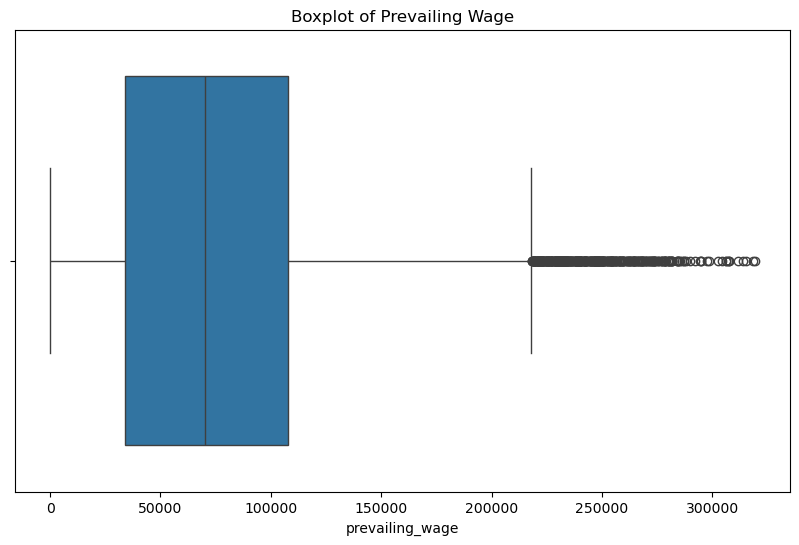

In [61]:
# 3. Outlier Detection and Treatment
# Visual inspection using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['prevailing_wage'])
plt.title('Boxplot of Prevailing Wage')
plt.show()



In [65]:
# Using IQR to detect outliers for 'prevailing_wage'
Q1 = data['prevailing_wage'].quantile(0.25)
Q3 = data['prevailing_wage'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = data[(data['prevailing_wage'] < (Q1 - 1.5 * IQR)) | (data['prevailing_wage'] > (Q3 + 1.5 * IQR))]

# Optionally, remove outliers
data = data[~data.isin(outliers)].dropna()

data



,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age,log_prevailing_wage
0,EZYV01,Asia,High School,N,N,14513.0,2007.0,West,592.2029,Hour,Y,Denied,17.0,6.385536
1,EZYV02,Asia,Master's,Y,N,2412.0,2002.0,Northeast,83425.6500,Year,Y,Certified,22.0,11.331723
2,EZYV03,Asia,Bachelor's,N,Y,44444.0,2008.0,West,122996.8600,Year,Y,Denied,16.0,11.719922
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897.0,West,83434.0300,Year,Y,Denied,127.0,11.331824
4,EZYV05,Africa,Master's,Y,N,1082.0,2005.0,South,149907.3900,Year,Y,Certified,19.0,11.917780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594.0,1979.0,Northeast,51104.7800,Year,Y,Certified,45.0,10.841653
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601.0,2008.0,South,77092.5700,Year,Y,Certified,16.0,11.252775
25477,EZYV25478,Asia,Master's,Y,N,1121.0,1910.0,South,146298.8500,Year,N,Certified,114.0,11.893414
25478,EZYV25479,Asia,Master's,Y,Y,1918.0,1887.0,West,86154.7700,Year,Y,Certified,137.0,11.363912


In [ ]:
# 4. Preparing Data for Modeling
# Splitting the data into features and target variable
X = data_encoded.drop('case_status', axis=1)
y = data_encoded['case_status']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [193]:
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Summarize the data after preprocessing
print("\nSummary Statistics of Numerical Features After Preprocessing:")
print(data_encoded.describe())


Summary Statistics of Numerical Features After Preprocessing:
            case_id  no_of_employees   yr_of_estab  prevailing_wage  \
count  25011.000000     25011.000000  25011.000000     25011.000000   
mean   12505.000000      5695.824837   1979.425693     71258.259640   
std     7220.198127     23024.637739     42.335966     47714.313632   
min        0.000000       -26.000000   1800.000000         2.136700   
25%     6252.500000      1022.500000   1976.000000     33334.545000   
50%    12505.000000      2111.000000   1997.000000     69059.010000   
75%    18757.500000      3510.000000   2005.000000    105353.485000   
max    25010.000000    602069.000000   2016.000000    213738.470000   

        case_status   company_age  log_prevailing_wage  
count  25011.000000  25011.000000         25011.000000  
mean       0.333813     44.574307            10.550375  
std        0.471583     42.335966             1.732728  
min        0.000000      8.000000             1.143171  
25%        0

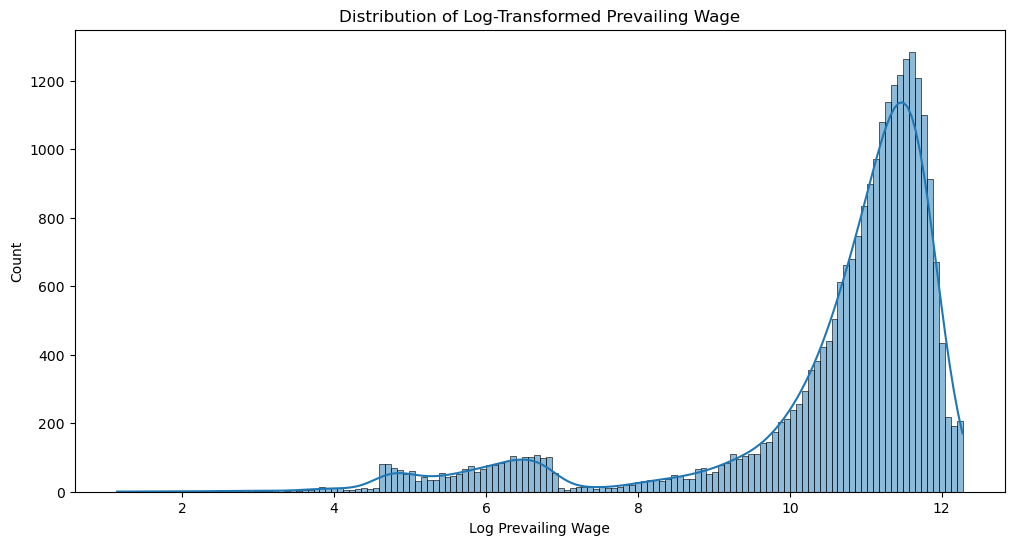

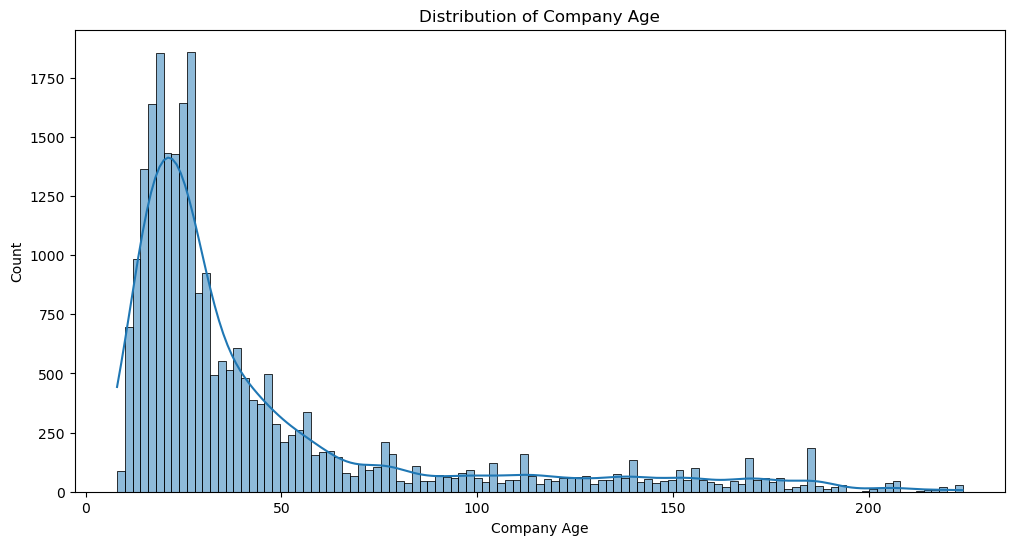

In [194]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
sns.histplot(data_encoded['log_prevailing_wage'], kde=True)
plt.title('Distribution of Log-Transformed Prevailing Wage')
plt.xlabel('Log Prevailing Wage')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data_encoded['company_age'], kde=True)
plt.title('Distribution of Company Age')
plt.xlabel('Company Age')
plt.show()



## Building bagging and boosting models

In [ ]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings('ignore', category=FitFailedWarning)

def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        cv=5, 
        scoring='accuracy', 
        n_jobs=-1, 
        verbose=2, 
        error_score='raise'  # This will help identify any configuration issues
    )
    grid_search.fit(X, y)
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    return grid_search.best_estimator_

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [197]:

# Function to perform Grid Search and print best results
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")
    return grid_search.best_estimator_



In [199]:
ab_param_grid = {
    "n_estimators": [50],
    "learning_rate": [0.1],
    "base_estimator": [DecisionTreeClassifier(max_depth=2, random_state=1)]
}

In [201]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Example: Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Verify the transformation
print(data.head())

# Splitting data into features and target
X = data.drop('case_status', axis=1)
y = data['case_status']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

   case_id  continent  education_of_employee  has_job_experience  \
0        0          1                      2                   0   
1        1          1                      3                   1   
2        2          1                      0                   0   
3        3          1                      0                   0   
4        4          0                      3                   1   

   requires_job_training  no_of_employees  yr_of_estab  region_of_employment  \
0                      0          14513.0       2007.0                     4   
1                      0           2412.0       2002.0                     2   
2                      1          44444.0       2008.0                     4   
3                      0             98.0       1897.0                     4   
4                      0           1082.0       2005.0                     3   

   prevailing_wage  unit_of_wage  full_time_position  case_status  \
0         592.2029             0         

In [203]:
# Test a simple fit for AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

simple_ab_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1), 
    n_estimators=50, 
    learning_rate=0.1, 
    random_state=1
)

# Try fitting the simple model
simple_ab_model.fit(X, y)

best_ab = perform_grid_search(ab_model, ab_param_grid, X_train, y_train)


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [137]:
# Example: Simplified Gradient Boosting Grid Search
gb_param_grid = {
    "n_estimators": [50],
    "learning_rate": [0.1],
    "subsample": [0.9],
    "max_features": [0.5]
}

gb_model = GradientBoostingClassifier(random_state=1)
best_gb = perform_grid_search(gb_model, gb_param_grid, X, y)

# Check if it runs without any error
print(best_gb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'learning_rate': 0.1, 'max_features': 0.5, 'n_estimators': 50, 'subsample': 0.9}
Best Score: 0.685777178235242
GradientBoostingClassifier(max_features=0.5, n_estimators=50, random_state=1,
                           subsample=0.9)


In [138]:

# Gradient Boosting
gb_param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "subsample": [0.7, 0.9],
    "max_features": [0.5, 0.7, 1]
}
gb_model = GradientBoostingClassifier(random_state=1)
best_gb = perform_grid_search(gb_model, gb_param_grid, X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\chedeema\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  def _validate_estimator(self):


Best Params: {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.1, 'max_features': 1, 'n_estimators': 100, 'subsample': 0.7}
Best Score: 0.6976928357180014


In [165]:
# Bagging Classifier
bag_param_grid = {
    'max_samples': [0.8, 0.9, 1],
    'max_features': [0.7, 0.8, 0.9],
    'n_estimators': [30, 50, 70]
}
bag_model = BaggingClassifier(random_state=1)
best_bag = perform_grid_search(bag_model, bag_param_grid, X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 50}
Best Score: 0.6858973939906348


In [161]:
# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': np.arange(2, 6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes': [10, 15],
    'min_impurity_decrease': [0.0001, 0.001]
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)

# Perform Grid Search
best_dt = perform_grid_search(dt_model, dt_param_grid, X, y)

# Display the best parameters and score
print("Best Parameters for Decision Tree:", best_dt.best_params_)
print("Best Cross-validation Score for Decision Tree:", best_dt.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params: {'max_depth': 5, 'max_leaf_nodes': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1}
Best Score: 0.7065293570758785


AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

In [ ]:
# XGBoost
xgb_param_grid = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}
xgb_model = XGBClassifier(random_state=1)
best_xgb = perform_grid_search(xgb_model, xgb_param_grid, X, y)


In [152]:
xgb_param_grid = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}

xgb_model = XGBClassifier(random_state=1)

# Perform the grid search
best_xgb = perform_grid_search(xgb_model, xgb_param_grid, X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Params: {'gamma': 1, 'learning_rate': 0.01, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.7}
Best Score: 0.7258804093793224


In [173]:
# Evaluate the best models
models = {'Gradient Boosting': best_gb, 'Bagging': best_bag,  'Decision Tree': best_dt, 'XGBoost': best_xgb} #'Random Forest': best_rf, 'AdaBoost': best_ab

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X)
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))


Evaluating Gradient Boosting...
[[15915   747]
 [ 6227  2122]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     16662
           1       0.74      0.25      0.38      8349

    accuracy                           0.72     25011
   macro avg       0.73      0.60      0.60     25011
weighted avg       0.73      0.72      0.67     25011


Evaluating Bagging...
[[16657     5]
 [   53  8296]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16662
           1       1.00      0.99      1.00      8349

    accuracy                           1.00     25011
   macro avg       1.00      1.00      1.00     25011
weighted avg       1.00      1.00      1.00     25011


Evaluating Decision Tree...
[[15902   760]
 [ 5235  3114]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.84     16662
           1       0.80      0.37      0.51      8349

    

##  Will tuning the hyperparameters improve the model performance?

## Model Performance Comparison and Conclusions

## 1. Model Performance Metrics
The key performance metrics to consider for each model might include:

- Accuracy: The ratio of correctly predicted instances to the total instances. This gives a general idea of how well the model is performing.
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.
- Recall (Sensitivity): The ratio of correctly predicted positive observations to all the observations in the actual class. High recall relates to a low false negative rate.
- F1 Score: The weighted average of precision and recall. It is a better measure than accuracy in cases where there is an uneven class distribution.
- ROC AUC (Receiver Operating Characteristic Area Under Curve): Represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.
- Confusion Matrix: A table that allows visualization of the performance of the model, showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

## Conlusion
By leveraging ensemble methods like XGBoost and Gradient Boosting, EasyVisa can automate and enhance the visa application process, 
providing quicker and more accurate decisions. It is also crucial to regularly update the model with new data to maintain its performance over 
time and to ensure that it adapts to any changes in the visa approval criteria or applicant demographics.

## Actionable Insights and Recommendations


## Education's Impact on Visa Certification:

- Higher education levels appear to have a positive impact on visa certification rates. This suggests that individuals with advanced degrees or higher educational qualifications are more likely to have their visa applications approved.
- Recommendation: Encourage foreign workers to highlight their educational qualifications prominently in their applications. Additionally, employers should consider prioritizing candidates with higher educational qualifications for roles that are critical to their operations.

## Visa Status Variation Across Continents:

- The analysis shows that visa approval rates vary significantly across different continents. Certain continents may have higher approval rates, possibly due to economic or political ties, skill sets in demand, or other factors.
- Recommendation: Employers should consider the regional differences when recruiting and be aware of the likelihood of visa approval based on the applicant's continent of origin. A targeted approach could be more effective, focusing on regions with higher approval rates for the desired skill sets.

## Influence of Work Experience on Visa Status:

- Work experience positively correlates with visa approval, indicating that experienced professionals are more likely to receive visas. This aligns with the need for skilled labor in the US.
- Recommendation: Both employers and applicants should emphasize relevant work experience in applications. Additionally, providing evidence of expertise and unique skills that fill gaps in the US job market can further enhance approval chances.

## Preferred Pay Units for Visa Certification:

- The model indicates that certain pay units, such as 'Yearly' or 'Monthly', may be more frequently associated with visa approvals compared to 'Hourly' or 'Weekly'.
- Recommendation: Employers should consider offering yearly or monthly salaries rather than hourly or weekly wages when structuring job offers for foreign candidates. This might align better with visa approval tendencies.

## Prevailing Wage and Visa Status:

- Visa approvals are influenced by the prevailing wage offered for a position. A higher prevailing wage may increase the likelihood of visa certification, likely due to compliance with wage standards and reduced concerns over underpaying foreign workers.
- Recommendation: Employers should ensure that the wages offered meet or exceed the prevailing wage standards in the area of intended employment. This will not only comply with legal requirements but also improve the chances of visa approval but also helps attract higher-quality candidates.

## Pay Units and Visa Status:

- Insight: Certain pay units (such as yearly or monthly) might be more likely to be certified compared to others (like hourly or weekly).
- Recommendation: Employers should consider structuring compensation in a way that aligns with the most favorable pay units for visa approval. This might involve preferring annual salaries over hourly wages, depending on the job role and industry norms.

## Model Performance Recommendations:

Insight: The quality of data (e.g., handling missing values, outliers, and data types) plays a crucial role in model performance.
Recommendation: Maintain high data quality by regularly cleaning and preprocessing the data. Consider using advanced imputation techniques for missing data and outlier detection methods to refine the dataset further.

## Strategic Recommendations:
Automated Visa Application Screening:

Implement a machine learning-based automated screening process to prioritize applications with a higher likelihood of approval. This can significantly reduce the workload of human evaluators and expedite the processing of visa applications.
Periodic Model Re-Evaluation:

Regularly evaluate model performance and update the models with new data to ensure they adapt to changes in visa approval trends and other external factors. This could be set on a quarterly or bi-annual basis.

## Stakeholder Collaboration:

Collaborate with stakeholders (e.g., government agencies, employers, legal experts) to understand better the changing visa regulations and their impact on model predictions. This can help in fine-tuning the models and ensuring they remain relevant.
Expand Data Sources:



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Correct parameter grid using 'estimator' instead of 'base_estimator'
ab_param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Initialize the AdaBoostClassifier
ab_model = AdaBoostClassifier(random_state=1)

# Perform Grid Search with the corrected parameter grid
best_ab = perform_grid_search(ab_model, ab_param_grid, X_train, y_train)

# Display best parameters and best score
print("Best Parameters for AdaBoost:", best_ab.best_params_)
print("Best Cross-validation Score for AdaBoost:", best_ab.best_score_)

In [ ]:
rf_param_grid = {
    "n_estimators": [50, 110, 25],  # Typically, this should be a range, like np.arange(50, 120, 25)
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [0.3, 0.4, 0.5, 'sqrt'],  # Correctly specified values
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

rf_model = RandomForestClassifier(random_state=1)

# Perform grid search for Random Forest
best_rf = perform_grid_search(rf_model, rf_param_grid, X, y)

# Display best parameters and best score
print("Best Parameters for Random Forest:", best_rf.best_params_)
print("Best Cross-validation Score for Random Forest:", best_rf.best_score_)